In [127]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [128]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'GCARSOA1.MX'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [129]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,76.000000,72.410004,72.410004,75.489998,1763092.0,74.507072
2019-03-21,75.849998,74.900002,75.500000,75.559998,532845.0,74.576164
2019-03-22,76.000000,72.070000,75.550003,73.610001,376202.0,72.651550
2019-03-25,77.989998,73.620003,73.930000,75.550003,511638.0,74.566292
2019-03-26,75.459999,74.000000,75.199997,74.769997,391804.0,73.796440


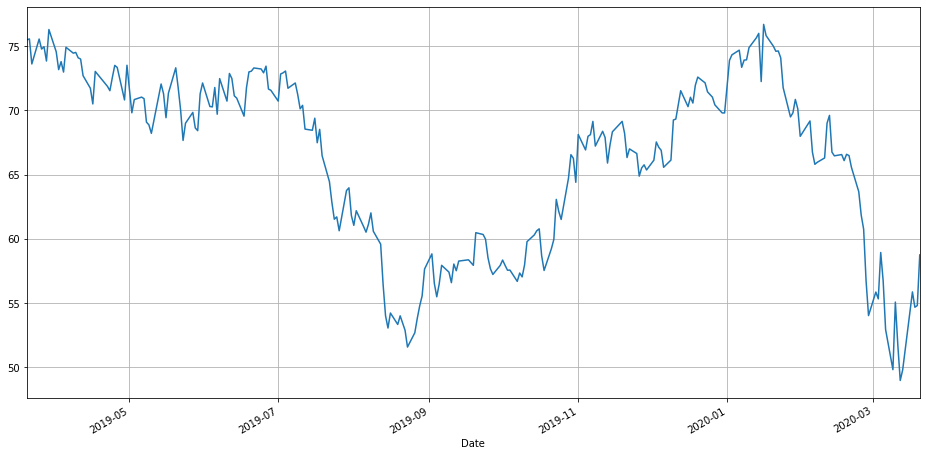

In [130]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [131]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [132]:
df2 = ROC(data, 10)

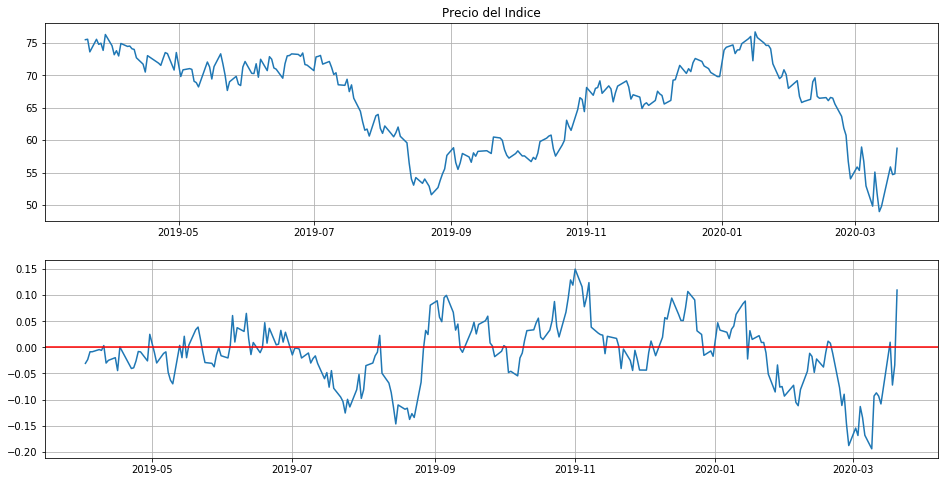

,Close,ROC_10,Recomendación
Date,,,
2019-04-10,74.089996,0.003386,Se recomienda COMPRAR la acción. (DIV)
2019-04-11,73.989998,-0.030148,Se recomienda VENDER la acción.
2019-04-17,73.029999,0.000685,Se recomienda COMPRAR la acción.
2019-04-22,71.870003,-0.040582,Se recomienda VENDER la acción.
2019-04-30,73.510002,0.024958,Se recomienda COMPRAR la acción.
2019-05-02,69.809998,-0.009787,Se recomienda VENDER la acción.
2019-05-13,71.070000,0.003672,Se recomienda COMPRAR la acción.
2019-05-14,72.050003,-0.019861,Se recomienda VENDER la acción. (DIV)
2019-05-15,71.290001,0.021200,Se recomienda COMPRAR la acción. (DIV)


In [133]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]